In [5]:
import os
from astropy.io import ascii
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from astroquery.jplsbdb import SBDB
from bs4 import BeautifulSoup
from urllib.request import urlopen 
from scipy import optimize
import pandas as pd
import numpy as np
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.optimize import curve_fit
import glob
from matplotlib.patches import Rectangle
from tqdm.notebook import tqdm

def linear (x,a,b):
    return a*x+b

def linear_fig(x,y,ex,xrange=False):
    popt,pcov = curve_fit(linear,x,y,
                         sigma=ex)
    rang = abs(max(x)-min(x))
    x = np.arange(min(x)-rang*0.5,max(x)+rang*0.5,0.01)
    if xrange!=False:
        x =  np.arange(xrange[0],xrange[1],0.01)
    y = linear(x,*popt)
    return(x,y)

def plot_marker(r,c,x,y,xerr,yerr,marker,mec,mfc,ms,zorder,alpha):
    ax[r,c].errorbar(x,y,
                    ls='',marker=marker,mec='none',mfc=mfc, ms = ms,
                     zorder=zorder,alpha=alpha)
    ax[r,c].errorbar(x,y,xerr=xerr,yerr=yerr,
                    ls='',marker=marker,mec=mec,mfc='none', ms = ms, ecolor=mec,
                     elinewidth=0.8,zorder=zorder)

def ms_size(x,size):
    if len(x)==1:
        return size
    else:
        return size*len(x)/1.4


path = os.path.join(os.getenv("HOME"),'Dropbox/Research')
df = pd.read_csv(os.path.join(path,'Hydrated_asteroid','Manuscript','database_geem24.csv'))
coef = pd.read_csv(os.path.join(path,'Hydrated_asteroid','Manuscript','Archive_Coeiff_compile.csv'))

## #Figure 3

  0%|          | 0/653 [00:00<?, ?it/s]

/var/folders/3y/81tkh9q91_bg2126ywrxppk80000gn/T/ipykernel_81523/113501293.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i['Pmin'] = np.nan
/var/folders/3y/81tkh9q91_bg2126ywrxppk80000gn/T/ipykernel_81523/113501293.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i['ePmin'] = np.nan


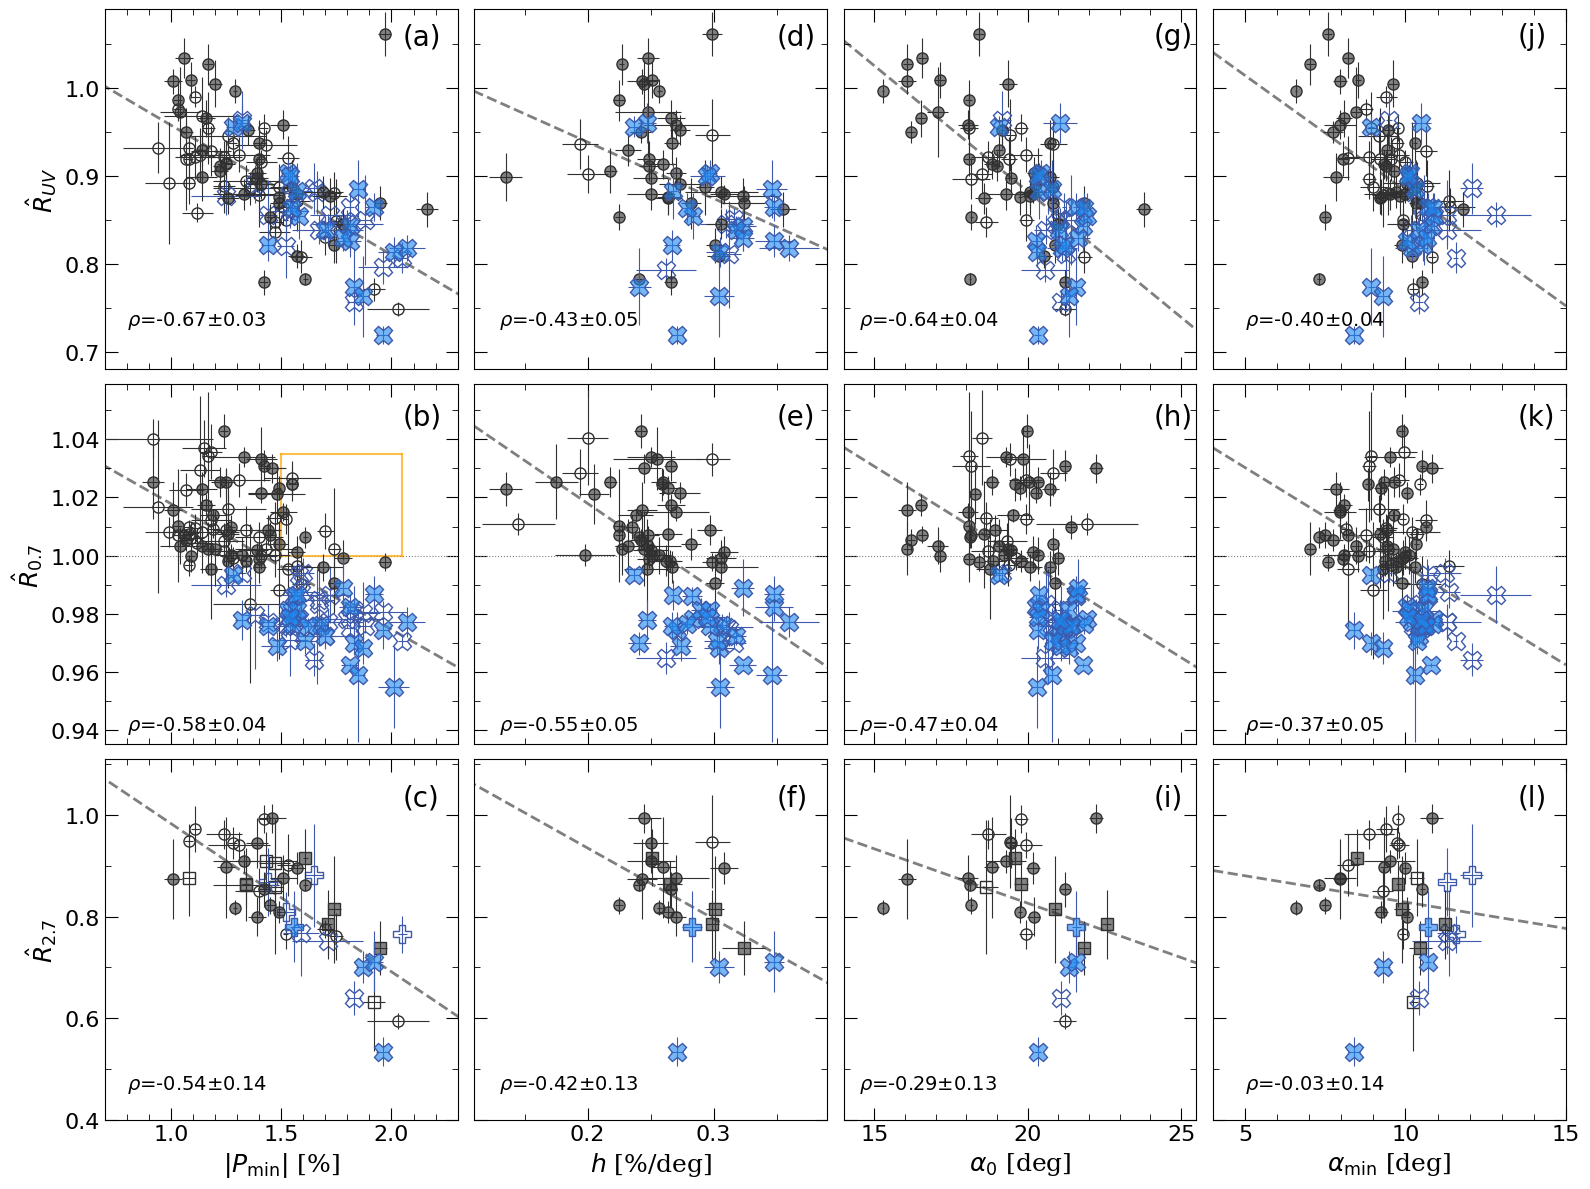

In [17]:

row=3
fig, ax = plt.subplots (3,4, figsize = (16,12),sharey='row', sharex='col')
font ={'fontsize':18,'family':'serif'}    
font_ ={'fontsize':14,'family':'serif'}    
ax[2,0].set_xlabel(r'$|P_\mathrm{min}|$ [%]',fontdict=font)    
ax[2,1].set_xlabel(r'$h $ [%/deg]',fontdict=font)    
ax[2,2].set_xlabel(r'$\alpha_0 $ [deg]',fontdict=font)    
ax[2,3].set_xlabel(r'$\alpha_\mathrm{min} $ [deg]',fontdict=font)    
ax[0,0].set_ylabel(r'$\hat{R}_{UV}$',fontdict=font)    
ax[1,0].set_ylabel(r'$\hat{R}_\mathrm{0.7}$',fontdict=font)    
ax[2,0].set_ylabel(r'$\hat{R}_\mathrm{2.7}$',fontdict=font)

for r in range(row):             
    for col in range(4):
        ax[r,col].tick_params(axis = 'y')
        ax[r,col].yaxis.set_ticks_position('both')
        ax[r,col].xaxis.set_ticks_position('both')
        ax[r,col].tick_params(axis ='x',which='major', length=9)
        ax[r,col].tick_params(axis ='y',which='major', length=9)
        ax[r,col].tick_params(axis ='both',which='both', direction='in')
        ax[r,col].tick_params(axis = 'both', which='minor', length=4.5)     
        ax[r,col].tick_params(axis = 'both',labelsize=16)     
        ax[r,0].xaxis.set_major_locator(MultipleLocator(0.5))
        ax[r,0].xaxis.set_minor_locator(MultipleLocator(0.1))
        ax[r,1].xaxis.set_major_locator(MultipleLocator(0.1))
        ax[r,1].xaxis.set_minor_locator(MultipleLocator(0.05))
        ax[r,2].xaxis.set_major_locator(MultipleLocator(5))
        ax[r,2].xaxis.set_minor_locator(MultipleLocator(1))
        ax[r,3].xaxis.set_major_locator(MultipleLocator(5))
        ax[r,3].xaxis.set_minor_locator(MultipleLocator(1))
        ax[0,col].yaxis.set_major_locator(MultipleLocator(0.1))
        ax[0,col].yaxis.set_minor_locator(MultipleLocator(0.05))
        ax[1,col].yaxis.set_major_locator(MultipleLocator(0.02))
        ax[1,col].yaxis.set_minor_locator(MultipleLocator(0.01))
        ax[2,col].yaxis.set_major_locator(MultipleLocator(0.2))
        ax[2,col].yaxis.set_minor_locator(MultipleLocator(0.1))
        
for col in range(4):
    ax[0,col].set_ylim(0.68,1.09)
    ax[1,col].set_ylim(0.935,1.059)
    ax[2,col].set_ylim(0.4,1.11)
for r in range(3):
    ax[r,0].set_xlim(0.7, 2.3)
    ax[r,1].set_xlim(0.11, 0.39)
    ax[r,2].set_xlim(14,25.5)
    ax[r,3].set_xlim(4,15)
   

ax[0,0].annotate('(a)',xy=(2.05,1.05),fontsize=20, color='k')
ax[0,1].annotate('(d)',xy=(0.35,1.05),fontsize=20, color='k')
ax[0,2].annotate('(g)',xy=(24.1,1.05),fontsize=20, color='k')
ax[0,3].annotate('(j)',xy=(13.5,1.05),fontsize=20, color='k')

ax[1,0].annotate('(b)',xy=(2.05,1.045),fontsize=20, color='k')
ax[1,1].annotate('(e)',xy=(0.35,1.045),fontsize=20, color='k')
ax[1,2].annotate('(h)',xy=(24.1,1.045),fontsize=20, color='k')
ax[1,3].annotate('(k)',xy=(13.5,1.045),fontsize=20, color='k')

ax[2,0].annotate('(c)',xy=(2.05,1.02),fontsize=20, color='k')
ax[2,1].annotate('(f)',xy=(0.35,1.02),fontsize=20, color='k')
ax[2,2].annotate('(i)',xy=(24.1,1.02),fontsize=20, color='k')
ax[2,3].annotate('(l)',xy=(13.5,1.02),fontsize=20, color='k')

ax[1,0].axhline(1,ls=':',lw=0.8,color='gray')
ax[1,1].axhline(1,ls=':',lw=0.8,color='gray')
ax[1,2].axhline(1,ls=':',lw=0.8,color='gray')
ax[1,3].axhline(1,ls=':',lw=0.8,color='gray')

ax[1,0].plot([1.5,1.5],[1,1.035],color='orange',lw=1.5,alpha=0.7)    
ax[1,0].plot([2.05,2.05],[1,1.035],color='orange',lw=1.5,alpha=0.7)    
ax[1,0].plot([1.5,2.05],[1,1],color='orange',lw=1.5,alpha=0.7)    
ax[1,0].plot([1.5,2.05],[1.035,1.035],color='orange',lw=1.5,alpha=0.7) 

def ms_size(x,size):
    if len(x)==1:
        return size
    else:
        return size*len(x)/1.4

sample_=[]
takir = []


ahahahahahah=[]
for ID in tqdm(df['ID'].values):
    df_i = df[df['ID']==ID]
    sample = -1
    if str(df_i['Pmin'].values[0])!='nan' and str(df_i['h'].values[0])!='nan':
        sample = 0
    sample_.append(sample)
    marker='o'
    mfc = 'none'
    mec='#303030'
    ms=8
    zorder=10
    alpha=0.6
    if sample==0:
        marker='o'
        mfc = '#303030'
        mec='#303030'
        ms=8
        zorder=13
        alpha = 0.6
    

    if str(df_i['R_07'].values[0])!='nan':
        if np.round(df_i['R_07'].values[0]+df_i['eR_07'].values[0],3) < 1:
            marker='X'#r'${0}$'.format(ID) #'X'
            mfc = 'none'
            mec='#3D59AB'
            ms=13
            zorder=12
            if sample==0:
                marker='X'
                mfc = '#1C86EE'
                mec='#3D59AB'
                ms=13#ms_size(str(ID), 13)
                zorder=15
                alpha = 0.6
                
    if df_i['ePmin'].values > 0.299:
        df_i['Pmin'] = np.nan
        df_i['ePmin'] = np.nan

    plot_marker(0,0,-1*df_i['Pmin'],df_i['R_UV'],df_i['ePmin'],df_i['eR_UV'],
                marker,mec,mfc,ms,zorder,alpha)
    plot_marker(0,1,df_i['h'],df_i['R_UV'],df_i['eh'],df_i['eR_UV'],
                marker,mec,mfc,ms,zorder,alpha)
    plot_marker(0,2,df_i['a0'],df_i['R_UV'],df_i['ea0'],df_i['eR_UV'],
                    marker,mec,mfc,ms,zorder,alpha)
    plot_marker(0,3,df_i['amin'],df_i['R_UV'],df_i['eamin'],df_i['eR_UV'],
                    marker,mec,mfc,ms,zorder,alpha)
    
    if df_i['R_07_flag'].values != -1:
        plot_marker(1,0,-1*df_i['Pmin'],df_i['R_07'],df_i['ePmin'],df_i['eR_07'],
                        marker,mec,mfc,ms,zorder,alpha)
        plot_marker(1,1,df_i['h'],df_i['R_07'],df_i['eh'],df_i['eR_07'],
                        marker,mec,mfc,ms,zorder,alpha)
        plot_marker(1,2,df_i['a0'],df_i['R_07'],df_i['ea0'],df_i['eR_07'],
                        marker,mec,mfc,ms,zorder,alpha)
        plot_marker(1,3,df_i['amin'],df_i['R_07'],df_i['eamin'],df_i['eR_07'],
                        marker,mec,mfc,ms,zorder,alpha)

    

    if ID == 1015:
        continue
    if df_i['ref_R_27'].values[0] != 'Usui18':
        marker = dict({'o':'s','X':'P'})[marker]
    plot_marker(2,0,-1*df_i['Pmin'],df_i['R_27'],df_i['ePmin'],df_i['eR_27'],
                    marker,mec,mfc,ms,zorder,alpha)
    plot_marker(2,1,df_i['h'],df_i['R_27'],df_i['eh'],df_i['eR_27'],
                    marker,mec,mfc,ms,zorder,alpha)
    plot_marker(2,2,df_i['a0'],df_i['R_27'],df_i['ea0'],df_i['eR_27'],
                    marker,mec,mfc,ms,zorder,alpha)
    plot_marker(2,3,df_i['amin'],df_i['R_27'],df_i['eamin'],df_i['eR_27'],
                    marker,mec,mfc,ms,zorder,alpha)
    ahahahahahah.append(ID)
    
    
    if  df_i['ref_R_27'].values[0] != 'Usui18' and str(df_i['R_27'].values[0])!='nan':
        if str(df_i['Pmin'].values[0])!='nan':
            takir.append(df_i['full name'].values[0])
        if str(df_i['h'].values[0])!='nan':
            takir.append(df_i['full name'].values[0])
        if str(df_i['a0'].values[0])!='nan':
            takir.append(df_i['full name'].values[0])
        if str(df_i['amin'].values[0])!='nan':
            takir.append(df_i['full name'].values[0])
        
c_Pmin = coef[coef['COMP1']=='Pmin']
c_h = coef[coef['COMP1']=='h']
c_a0 = coef[coef['COMP1']=='a0']
c_amin = coef[coef['COMP1']=='amin']

y_coor = [0.73,0.94,0.46]
color='k'
for n, spec in enumerate(['R_UV','R_07','R_27']):
    c_spec = c_Pmin[c_Pmin['COMP2']==spec] #Pmin
    ax[n,0].annotate(r'$\rho$={0:.2f}$\pm${1:.2f}'.format(c_spec['rho'].values[0],c_spec['erho'].values[0]),
                     xy=(0.80,y_coor[n]),fontsize=14, color=color)
    c_spec = c_h[c_h['COMP2']==spec] #h
    ax[n,1].annotate(r'$\rho$={0:.2f}$\pm${1:.2f}'.format(c_spec['rho'].values[0],c_spec['erho'].values[0]),
                     xy=(0.13,y_coor[n]),fontsize=14, color=color)
    
    c_spec = c_a0[c_a0['COMP2']==spec] #a0
    ax[n,2].annotate(r'$\rho$={0:.2f}$\pm${1:.2f}'.format(c_spec['rho'].values[0],c_spec['erho'].values[0]),
                     xy=(14.5,y_coor[n]),fontsize=14, color=color)

    c_spec = c_amin[c_amin['COMP2']==spec] #amin
    ax[n,3].annotate(r'$\rho$={0:.2f}$\pm${1:.2f}'.format(c_spec['rho'].values[0],c_spec['erho'].values[0]),
                     xy=(5,y_coor[n]),fontsize=14, color=color)
    
df['sample']=sample_


for n,key in enumerate(['Pmin','h','a0','amin']):
    for s,spec in enumerate(['R_UV','R_07','R_27']):
#         fig,ax2 = plt.subplots(1,1,figsize=(6,6))
        #Drawing the linear fit
        df_lin = df#[df['sample']==0]
        if spec=='R_07':
            df_lin = df_lin[df_lin['R_07_flag']!=-1]
        df_lin = df_lin.dropna(subset=[key,spec])    
        popt,pcov = curve_fit(linear,abs(df_lin[key]),df_lin[spec])
        x = np.arange(min(abs(df_lin[key]))*0.1,max(abs(df_lin[key]))*2,0.01)
        ax[s,n].plot(x, linear(x,*popt),lw=2, ls='--',color='k',alpha=0.5,zorder=1)  
        

fig.subplots_adjust(wspace=0.01)
fig.subplots_adjust(hspace=0.03)
plt.tight_layout()    
plt.savefig('fig3.pdf',dpi=600)
plt.show()



## #Figure 4

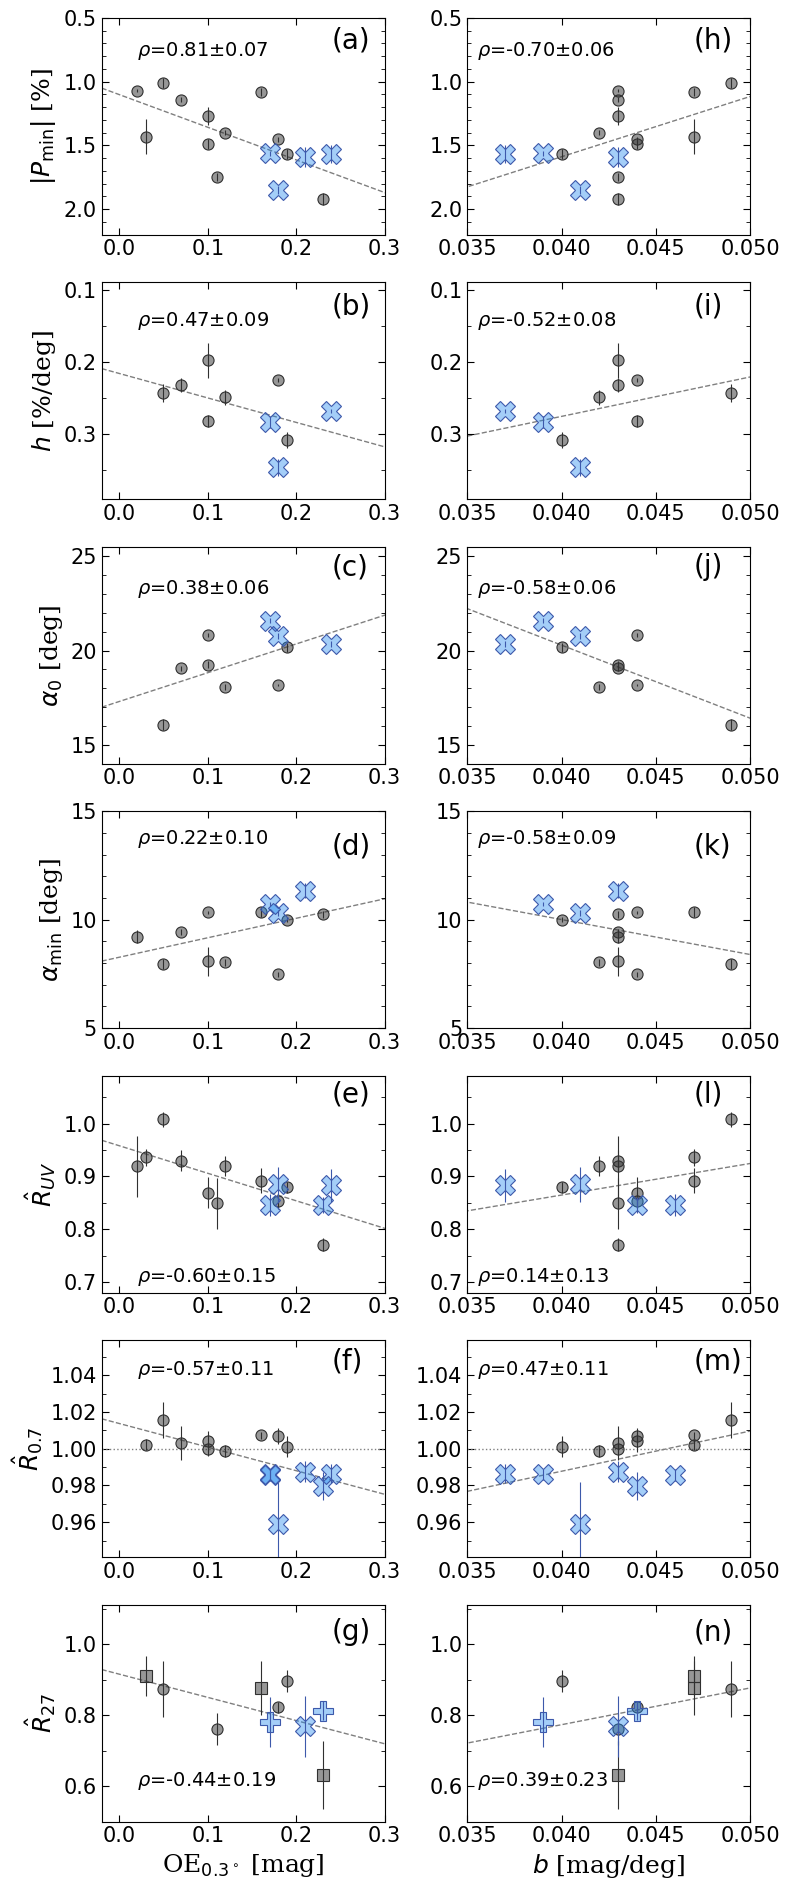

In [228]:
fig, ax = plt.subplots (7,2, figsize = (8,19))


font ={'fontsize':18,'family':'serif'}    
font_ ={'fontsize':14,'family':'serif'}    
ax[4,0].set_ylabel(r'$\hat{R}_{UV}$',fontdict=font)    
ax[5,0].set_ylabel(r'$\hat{R}_\mathrm{0.7}$',fontdict=font)    
ax[6,0].set_ylabel(r'$\hat{R}_\mathrm{27}$',fontdict=font)

ax[0,0].set_ylabel(r'$|P_\mathrm{min}|$ [%]',fontdict=font)    
ax[1,0].set_ylabel(r'$h$ [%/deg]',fontdict=font)    
ax[2,0].set_ylabel(r'$\alpha_0$ [deg]',fontdict=font)
ax[3,0].set_ylabel(r'$\alpha_\mathrm{min}$ [deg]',fontdict=font)

for r in [0,1,2,3,4,5,6]:
    ax[r,1].set_xlim(0.035,0.05)
    ax[r,0].set_xlim(-0.02,0.3)
    for i in [0,1]:
        ax[r,i].tick_params(axis = 'both', which='minor', length=3)
        ax[r,i].tick_params(axis ='both',which='both', direction='in')
        ax[r,i].tick_params(axis ='both',which='major', length=5)
        ax[r,i].tick_params(axis = 'both')
        ax[r,i].tick_params(axis='both',labelsize=15)
        ax[r,i].yaxis.set_ticks_position('both')
        ax[r,i].xaxis.set_ticks_position('both') 


for i in [0,1]:
    ax[0,i].set_ylim(2.2,0.5)
    ax[1,i].set_ylim(0.39,0.09)
    ax[2,i].set_ylim(14,25.5)
    ax[3,i].set_ylim(5,15)
    ax[4,i].set_ylim(0.68,1.09)
    ax[5,i].set_ylim(0.941,1.059)
    ax[6,i].set_ylim(0.5,1.11)


    ax[5,i].axhline(1,ls=':',lw=1,color='gray')
    ax[4,i].yaxis.set_major_locator(MultipleLocator(0.1))
    ax[4,i].yaxis.set_minor_locator(MultipleLocator(0.05))

    ax[5,i].yaxis.set_major_locator(MultipleLocator(0.02))
    ax[5,i].yaxis.set_minor_locator(MultipleLocator(0.01))

    ax[6,i].yaxis.set_major_locator(MultipleLocator(0.2))
    ax[6,i].yaxis.set_minor_locator(MultipleLocator(0.1))

    ax[0,i].yaxis.set_major_locator(MultipleLocator(0.5))
    ax[0,i].yaxis.set_minor_locator(MultipleLocator(0.1))

    ax[1,i].yaxis.set_major_locator(MultipleLocator(0.1))
    ax[1,i].yaxis.set_minor_locator(MultipleLocator(0.05))

    ax[2,i].yaxis.set_major_locator(MultipleLocator(5))
    ax[2,i].yaxis.set_minor_locator(MultipleLocator(1))
                         
    ax[3,i].yaxis.set_major_locator(MultipleLocator(5))
    ax[3,i].yaxis.set_minor_locator(MultipleLocator(1))  
    

fontsize=15
ax[6,0].set_xlabel(r'OE$_\mathrm{0.3^\circ}$ [mag]',fontdict=font)    
ax[6,1].set_xlabel(r'$b$ [mag/deg]',fontdict=font)    

pv_ = 0.24
ax[0,0].annotate('(a)',xy=(pv_,0.74),fontsize=20, color='k')
ax[1,0].annotate('(b)',xy=(pv_,0.135),fontsize=20, color='k')
ax[2,0].annotate('(c)',xy=(pv_,24),fontsize=20, color='k')
ax[3,0].annotate('(d)',xy=(pv_,13),fontsize=20, color='k')
ax[4,0].annotate('(e)',xy=(pv_,1.04),fontsize=20, color='k')
ax[5,0].annotate('(f)',xy=(pv_,1.043),fontsize=20, color='k')
ax[6,0].annotate('(g)',xy=(pv_,1.011),fontsize=20, color='k')


pv_ = 0.047
ax[0,1].annotate('(h)',xy=(pv_,0.74),fontsize=20, color='k')
ax[1,1].annotate('(i)',xy=(pv_,0.135),fontsize=20, color='k')
ax[2,1].annotate('(j)',xy=(pv_,24),fontsize=20, color='k')
ax[3,1].annotate('(k)',xy=(pv_,13),fontsize=20, color='k')
ax[4,1].annotate('(l)',xy=(pv_,1.04),fontsize=20, color='k')
ax[5,1].annotate('(m)',xy=(pv_,1.043),fontsize=20, color='k')
ax[6,1].annotate('(n)',xy=(pv_,1.011),fontsize=20, color='k')
                  

df_phot = df.dropna(subset=['OE'])    
xy_cor = dict({'Pmin':0.8, 'h':0.15,'a0':23,'amin':13.5,
               'R_UV':0.70,'R_07':1.04,'R_27':0.6,
              'd_BDUV':0.026,'d_BD07':0.008,'d_BD27':0.04})

for n, comp in enumerate(['Pmin','h','a0','amin','R_UV','R_07','R_27']):
    if n<4:
        
        c_phot = coef[coef['COMP1']==comp]
        c_oe = c_phot[c_phot['COMP2']=='OE']
        c_b = c_phot[c_phot['COMP2']=='b']
    if n>3:
        c_phot = coef[coef['COMP2']==comp]
        c_oe = c_phot[c_phot['COMP1']=='OE']
        c_b = c_phot[c_phot['COMP1']=='b']
    
    ax[n,0].annotate(r'$\rho$={0:.2f}$\pm${1:.2f}'.format(c_oe['rho'].values[0],c_oe['erho'].values[0]),
                     xy=(0.02,xy_cor[comp]),fontsize=14, color=color)
    ax[n,1].annotate(r'$\rho$={0:.2f}$\pm${1:.2f}'.format(c_b['rho'].values[0],c_b['erho'].values[0]),
                     xy=(0.0355,xy_cor[comp]),fontsize=14, color=color)
    
    df_lin = df_phot.dropna(subset=[comp])
    popt,pcov = curve_fit(linear,abs(df_lin['OE']),abs(df_lin[comp]))
    x = np.arange(-0.02,0.5, 0.001)
    ax[n,0].plot(x,linear(x,*popt),lw=1, ls='--',color='k',alpha=0.5,zorder=1)  
    
    popt,pcov = curve_fit(linear,abs(df_lin['b']),abs(df_lin[comp]))
    x = np.arange(0,0.06, 0.001)
    ax[n,1].plot(x,linear(x,*popt),lw=1, ls='--',color='k',alpha=0.5,zorder=1)  


for n,i in enumerate(df_phot['ID'].values):
    df_i = df_phot[df_phot['ID']==i]
    marker='o'#r'${0}$'.format(ID)#'o'
    mfc = '#303030'
    mec='#303030'
    ms=8
    zorder=8
    alpha=0.5
    if str(df_i['R_07'].values[0])!='nan':
        if np.round(df_i['R_07'].values[0]+df_i['eR_07'].values[0],3) < 1: #or ID in Ch_hase:
            marker='X'#r'${0}$'.format(ID)#X'
            mfc = '#1C86EE'
            mec='#3D59AB'
            ms=15
            zorder=15
            alpha = 0.4
            
    for c, comp in enumerate(['Pmin','h','a0','amin','R_UV','R_07','R_27']):
        if comp=='amin' and df_i['eamin'].values[0]>2:
            continue
        if str(df_i[comp].values[0])!='nan':
            
            if comp=='R_27' and df_i['ref_R_27'].values[0] != 'Usui18':
                marker = dict({'o':'s','X':'P'})[marker]
            if comp=='R_07':
                if df_i['R_07_flag'].values == -1:
                    continue
            ax[c,0].errorbar(df_i['OE'].values[0],abs(df_i[comp].values[0]),
                             alpha=alpha,
                             marker=marker,ls='',mfc=mfc,mec='none',ecolor=mec,ms=ms,zorder=zorder)
            ax[c,1].errorbar(df_i['b'].values[0],abs(df_i[comp].values[0]),
                             alpha=alpha,
                             marker=marker,ls='',mfc=mfc,mec='none',ecolor=mec,ms=ms,zorder=zorder)
            
            ax[c,0].errorbar(df_i['OE'].values[0],abs(df_i[comp].values[0]),
                             yerr=df_i['e'+comp].values[0],elinewidth=0.8,markeredgewidth=0.8,
                             marker=marker,ls='',mfc='none',mec=mec,ecolor=mec,ms=ms,zorder=zorder+1)
            ax[c,1].errorbar(df_i['b'].values[0],abs(df_i[comp].values[0]),
                             yerr=df_i['e'+comp].values[0],elinewidth=0.8,markeredgewidth=0.8,
                             marker=marker,ls='',mfc='none',mec=mec,ecolor=mec,ms=ms,zorder=zorder+1)
            

# fig.subplots_adjust(wspace=0.02)
# fig.subplots_adjust(hspace=0.2)
plt.tight_layout()
plt.savefig('fig4.pdf',dpi=600)
# plt.show()

## #Figure 5

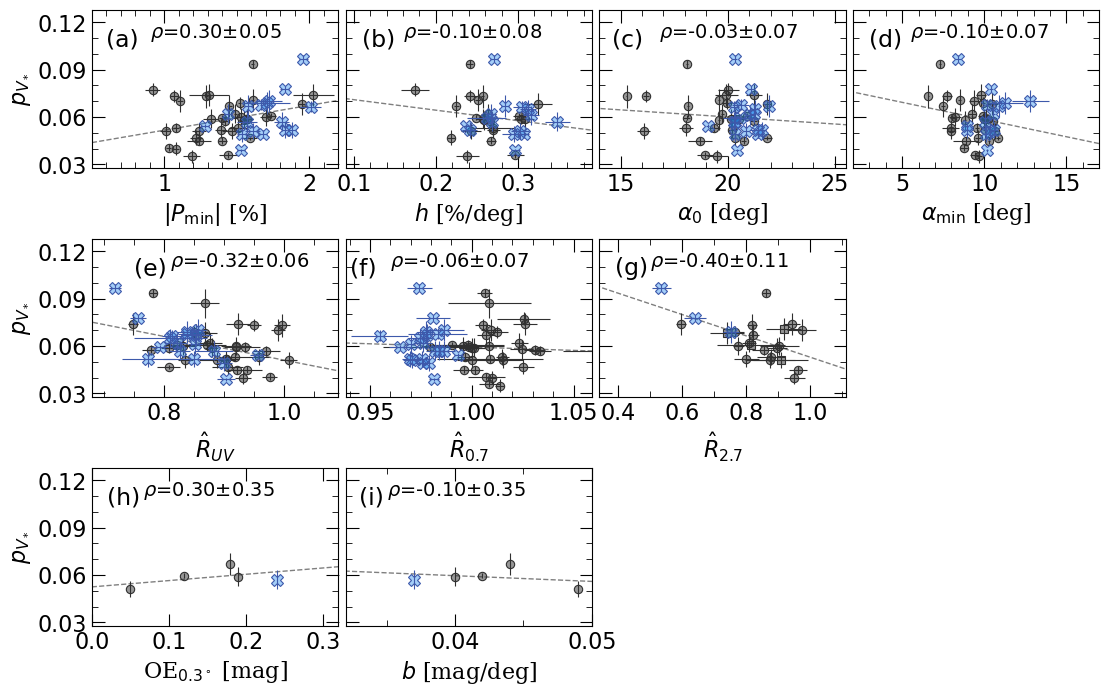

In [230]:
fig, ax = plt.subplots (3,4, figsize = (13,8))
font ={'fontsize':16,'family':'serif'}    
font_ ={'fontsize':14,'family':'serif'}    
df_pv = df.dropna(subset=['pV_s'])



ax[0,0].set_ylabel(r'$p_{V_*}$',fontdict=font)    
ax[1,0].set_ylabel(r'$p_{V_*}$',fontdict=font)
ax[2,0].set_ylabel(r'$p_{V_*}$',fontdict=font)


ax[0,0].set_xlabel(r'$|P_\mathrm{min}|$ [%]',fontdict=font)    
ax[0,1].set_xlabel(r'$h$ [%/deg]',fontdict=font)    
ax[0,2].set_xlabel(r'$\alpha_0$ [deg]',fontdict=font)
ax[0,3].set_xlabel(r'$\alpha_\mathrm{min}$ [deg]',fontdict=font)

ax[0,0].set_xlim(0.5,2.2)
ax[0,1].set_xlim(0.09,0.39)
ax[0,2].set_xlim(14,25.5)
ax[0,3].set_xlim(2,17)



ax[1,0].set_xlabel(r'$\hat{R}_{UV}$',fontdict=font)    
ax[1,1].set_xlabel(r'$\hat{R}_\mathrm{0.7}$',fontdict=font)    
ax[1,2].set_xlabel(r'$\hat{R}_\mathrm{2.7}$',fontdict=font)
ax[1,3].axis('off')

ax[1,0].set_xlim(0.68,1.09)
ax[1,1].set_xlim(0.938,1.059)
ax[1,2].set_xlim(0.34,1.11)


ax[2,0].set_xlabel(r'OE$_\mathrm{0.3^\circ}$ [mag]',fontdict=font)    
ax[2,1].set_xlabel(r'$b$ [mag/deg]',fontdict=font)   

ax[2,0].set_xlim(0,0.32)
ax[2,1].set_xlim(0.032,0.05)


ax[2,2].axis('off')
ax[2,3].axis('off')

pv_=0.105
fontsize = 17
ax[0,0].annotate('(a)',xy=(0.6, pv_),fontsize=fontsize, color='k')
ax[0,1].annotate('(b)',xy=(0.11, pv_),fontsize=fontsize, color='k')
ax[0,2].annotate('(c)',xy=(14.6, pv_),fontsize=fontsize, color='k')
ax[0,3].annotate('(d)',xy=(3, pv_),fontsize=fontsize, color='k')

ax[1,0].annotate('(e)',xy=(0.75, pv_),fontsize=fontsize, color='k')
ax[1,1].annotate('(f)',xy=(0.94, pv_),fontsize=fontsize, color='k')
ax[1,2].annotate('(g)',xy=(0.39, pv_),fontsize=fontsize, color='k')

ax[2,0].annotate('(h)',xy=(0.02, pv_),fontsize=fontsize, color='k')
ax[2,1].annotate('(i)',xy=(0.033, pv_),fontsize=fontsize, color='k')


xy_cor=dict({'Pmin':0.9,'h':0.16,'a0':16.8,'amin':5.5})
for n, comp in enumerate(['Pmin','h','a0','amin']):
    c_pV = coef[coef['COMP1']=='pV_s']
    c_oe = c_pV[c_pV['COMP2']==comp]
    ax[0,n].annotate(r'$\rho$={0:.2f}$\pm${1:.2f}'.format(c_oe['rho'].values[0],c_oe['erho'].values[0]),
                     xy=(xy_cor[comp],0.11),fontsize=14, color=color)
    df_pv_ = df_pv.dropna(subset=[comp])
    popt,pcov = curve_fit(linear,abs(df_pv_[comp]),df_pv_['pV_s'])
    x = np.arange(0,30, 0.1)
    ax[0,n].plot(x,linear(x,*popt),lw=1, ls='--',color='k',alpha=0.5,zorder=1)  
    
xy_cor=dict({'R_UV':0.81,'R_07':0.96,'R_27':0.5})
for n, comp in enumerate(['R_UV','R_07','R_27']):
    c_pV = coef[coef['COMP1']=='pV_s']
    c_oe = c_pV[c_pV['COMP2']==comp]
    ax[1,n].annotate(r'$\rho$={0:.2f}$\pm${1:.2f}'.format(c_oe['rho'].values[0],c_oe['erho'].values[0]),
                     xy=(xy_cor[comp],0.11),fontsize=14, color=color)
    df_pv_ = df_pv.dropna(subset=[comp])
    popt,pcov = curve_fit(linear,abs(df_pv_[comp]),df_pv_['pV_s'])
    x = np.arange(0,30, 0.1)
    ax[1,n].plot(x,linear(x,*popt),lw=1, ls='--',color='k',alpha=0.5,zorder=1)  

xy_cor=dict({'OE':0.066,'b':0.035})
for n, comp in enumerate(['OE','b']):
    c_pV = coef[coef['COMP1']=='pV_s']
    c_oe = c_pV[c_pV['COMP2']==comp]
    ax[2,n].annotate(r'$\rho$={0:.2f}$\pm${1:.2f}'.format(c_oe['rho'].values[0],c_oe['erho'].values[0]),
                     xy=(xy_cor[comp],0.11),fontsize=14, color=color)
    df_pv_ = df_pv.dropna(subset=[comp])
    popt,pcov = curve_fit(linear,abs(df_pv_[comp]),df_pv_['pV_s'])
    x = np.arange(0,30, 0.1)
    ax[2,n].plot(x,linear(x,*popt),lw=1, ls='--',color='k',alpha=0.5,zorder=1)  




for row in range(3):
    for col in [0,1,2,3]:
        ax[row,col].tick_params(axis = 'y')
        ax[row,col].yaxis.set_ticks_position('both')
        ax[row,col].xaxis.set_ticks_position('both')
        ax[row,col].tick_params(axis ='x',which='major', length=9)
        ax[row,col].tick_params(axis ='y',which='major', length=9)
        ax[row,col].tick_params(axis ='both',which='both', direction='in')
        ax[row,col].tick_params(axis = 'both', which='minor', length=4.5)     
        if col==0:
            ax[row,col].tick_params(axis = 'y',labelsize=16)    
        else:
            ax[row,col].tick_params(axis = 'y',labelsize=0)    
        ax[row,col].tick_params(axis = 'x',labelsize=16)     
        ax[row,col].yaxis.set_major_locator(MultipleLocator(0.03))
        ax[row,col].yaxis.set_minor_locator(MultipleLocator(0.01))
        ax[row,col].set_ylim(0.028,0.128)

        

for i in df_pv['ID'].values: 
    df_i = df_pv[df_pv['ID']==i]
    marker='o'#r'${0}$'.format(ID)#'o'
    mfc = '#303030'
    mec='#303030'
    ms=6
    zorder=8
    alpha=0.5
    if str(df_i['R_07'].values[0])!='nan':
        if np.round(df_i['R_07'].values[0]+df_i['eR_07'].values[0],3) < 1:#or ID in Ch_hase:
            marker='X'#r'${0}$'.format(ID)#X'
            mfc = '#1C86EE'
            mec='#3D59AB'
            ms=9
            zorder=15
            alpha = 0.4
            
            
    for c, comp in enumerate(['Pmin','h','a0','amin']):
        if str(df_i[comp].values[0])!='nan':
            ax[0,c].errorbar(abs(df_i[comp].values[0]),df_i['pV_s'].values[0],
                             alpha=alpha,
                             marker=marker,ls='',mfc=mfc,mec='none',ecolor=mec,ms=ms,zorder=zorder)
            ax[0,c].errorbar(abs(df_i[comp].values[0]),df_i['pV_s'].values[0],
                             yerr=df_i['epV_s'],xerr=df_i['e'+comp].values[0],elinewidth=0.8,markeredgewidth=0.8,
                             marker=marker,ls='',mfc='none',mec=mec,ecolor=mec,ms=ms,zorder=zorder+1)
           
            
            
    for c, comp in enumerate(['R_UV','R_07','R_27']):
        if str(df_i[comp].values[0])!='nan':
            if comp=='R_27' and df_i['ref_R_27'].values[0] != 'Usui18':
                marker = dict({'o':'s','X':'P'})[marker]
            if comp=='R_07':
                if df_i['R_07_flag'].values == -1:
                    continue
            ax[1,c].errorbar(abs(df_i[comp].values[0]),df_i['pV_s'].values[0],
                             alpha=alpha,
                             marker=marker,ls='',mfc=mfc,mec='none',ecolor=mec,ms=ms,zorder=zorder)
            ax[1,c].errorbar(abs(df_i[comp].values[0]),df_i['pV_s'].values[0],
                             yerr=df_i['epV_s'],xerr=df_i['e'+comp].values[0],elinewidth=0.8,markeredgewidth=0.8,
                             marker=marker,ls='',mfc='none',mec=mec,ecolor=mec,ms=ms,zorder=zorder+1)
            
    for c, comp in enumerate(['OE','b']):
        if str(df_i[comp].values[0])!='nan':
            ax[2,c].errorbar(abs(df_i[comp].values[0]),df_i['pV_s'].values[0],
                             alpha=alpha,
                             marker=marker,ls='',mfc=mfc,mec='none',ecolor=mec,ms=ms,zorder=zorder)
            ax[2,c].errorbar(abs(df_i[comp].values[0]),df_i['pV_s'].values[0],
                             yerr=df_i['epV_s'].values[0],elinewidth=0.8,markeredgewidth=0.8,
                             marker=marker,ls='',mfc='none',mec=mec,ecolor=mec,ms=ms,zorder=zorder+1)



ax[2,0].xaxis.set_major_locator(MultipleLocator(0.1))
ax[2,1].xaxis.set_minor_locator(MultipleLocator(0.005))
ax[0,0].xaxis.set_major_locator(MultipleLocator(1))
ax[0,0].xaxis.set_minor_locator(MultipleLocator(0.1))
ax[0,1].xaxis.set_minor_locator(MultipleLocator(0.02))
ax[0,2].xaxis.set_minor_locator(MultipleLocator(1))
ax[0,3].xaxis.set_minor_locator(MultipleLocator(1))

ax[1,0].xaxis.set_minor_locator(MultipleLocator(0.05))
ax[1,1].xaxis.set_minor_locator(MultipleLocator(0.01))
ax[1,2].xaxis.set_major_locator(MultipleLocator(0.2))
ax[1,2].xaxis.set_minor_locator(MultipleLocator(0.1))

fig.subplots_adjust(wspace=0.03)
fig.subplots_adjust(hspace=0.45)
# plt.tight_layout()
plt.savefig('fig5.pdf')
plt.show()

## #Figure 6

87 Sylvia (A866 KA) 70.0 60.0
227 Philosophia (A882 PA) 125.0 90.0
283 Emma (A889 CA) 110.0 105.0
444 Gyptis (A899 FA) 74.0 74.0
3200 Phaethon (1983 TB) 600.0 200.0
155140 (2005 UD) 300.0 110.0


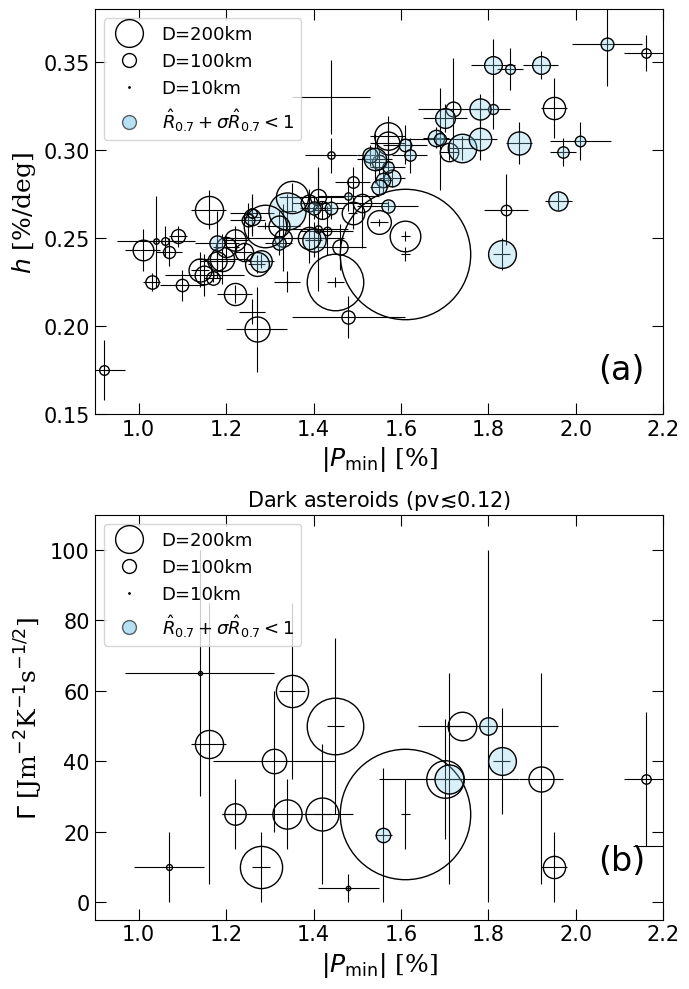

In [288]:
fig,ax = plt.subplots(2,1,figsize=(7,10))

for ID in df['ID'].values:
    df_i = df[df['ID']==ID]
    Type = str(df_i['spec_B(or BD)'].values[0])
    mfc='none'
    mec='k'
    ms = (df_i['Diameter'].values[0]/((200-10+10)+0.1))*20
    if df_i['eGamma'].values[0]>50 and str(df_i['Pmin'].values[0])!='nan':
        print(df_i['full name'].values[0], df_i['Gamma'].values[0], df_i['eGamma'].values[0])
        continue
    if df_i['R_07'].values[0]+df_i['eR_07'].values[0]<1:
        mfc='skyblue'
        alpha=0.3
        ax[1].errorbar(-1*df_i['Pmin'],df_i['Gamma'],
                   ls='',marker='o',mec='none',mfc=mfc,ms=ms,alpha=0.3)
    
    if ID in [87, 444]:
        continue
    ax[1].errorbar(-1*df_i['Pmin'],df_i['Gamma'],yerr=df_i['eGamma'],xerr=df_i['ePmin'],
                   ecolor='k',elinewidth=0.8,
                   ls='',marker='o',mec=mec,mfc='none',ms=ms)




# Pminh_fig = Pminh_fig[Pminh_fig['eh']<0.05]
for ID in df['ID'].values:
    df_i = df[df['ID']==ID]
    Type = str(df['spec_B(or BD)'].values[0])
    if Type == 'nan':
        Type = str(df['spec_T'].values[0])

    mfc='none'
    mec='k'
    ms = (df_i['Diameter'].values[0]/((200-10+10)+0.1))*20


    if df_i['R_07'].values[0]<1 or df_i['R_07'].values[0]<1:
        if df_i['R_07_flag'].values[0]!=-1:
            mfc='skyblue'
            alpha=0.3
        ax[0].errorbar(-1*df_i['Pmin'],df_i['h'],
                   ls='',marker='o',mec='none',mfc=mfc,ms=ms,alpha=0.3)
    ax[0].errorbar(-1*df_i['Pmin'],df_i['h'],yerr=df_i['eh'],xerr=df_i['ePmin'],
               ecolor='k',elinewidth=0.8,ls='',marker='o',
                   mec=mec,mfc='none',ms=ms)
    

font ={'fontsize':18,'family':'serif'}    
ax[1].set_xlabel(r'$|P_\mathrm{min}|$ [%]',fontdict=font) 
ax[0].set_xlabel(r'$|P_\mathrm{min}|$ [%]',fontdict=font) 
ax[0].set_ylabel(r'$h $ [%/deg]',fontdict=font) 
ax[1].set_ylabel(r'$\Gamma $ [Jm$^{-2}$K$^{-1}$s$^{-1/2}$]',fontdict=font) 
ax[1].set_ylim(-5,110)

ax[0].set_ylim(0.15,0.38)
for r in [0,1]:
    ax[r].tick_params(axis = 'y')
    ax[r].yaxis.set_ticks_position('both')
    ax[r].xaxis.set_ticks_position('both')
    ax[r].tick_params(axis ='x',which='major', length=8,labelsize=15)
    ax[r].tick_params(axis ='y',which='major', length=8,labelsize=15)
    ax[r].tick_params(axis ='both',which='both', direction='in')
    ax[r].tick_params(axis = 'both', which='minor', length=5)      
    ax[r].set_xlim(0.9,2.2)
    ax[r].errorbar(np.nan,np.nan,
              marker='o',ls='',
               mec='k',mfc='none',
              ms=(200/((200-10+10)+0.1))*20, label='D=200km')
    ax[r].errorbar(np.nan,np.nan,
                  marker='o',ls='',
                   mec='k',mfc='none',
                  ms=(100/((200-10+10)+0.1))*20, label='D=100km')
    ax[r].errorbar(np.nan,np.nan,
                  marker='o',ls='',
                   mec='k',mfc='none',
                  ms=(10/((200-10+10)+0.1))*20, label='D=10km')

    ax[r].errorbar(np.nan,np.nan,
                  marker='o',ls='',
                   mec='k',mfc='skyblue',alpha=0.6,
                  ms=10, label=r'$\hat{R}_\mathrm{0.7}+\sigma\hat{R}_\mathrm{0.7}<1$')
   
    ax[r].legend(fontsize=13, loc=2)
ax[1].annotate('(b)',xy=(2.05,9),fontsize=24)
ax[0].annotate('(a)',xy=(2.05,0.17),fontsize=24)
ax[1].set_title(r'Dark asteroids (pv$\lesssim$0.12)',fontsize=15)
plt.tight_layout()
plt.savefig('fig6.pdf')


In [80]:
tt = pd.read_csv('/Users/judy/Library/CloudStorage/Dropbox/Research/Hydrated_asteroid/Manuscript/temp2.csv')
t2 = pd.read_csv("/Users/judy/Library/CloudStorage/Dropbox/Research/Hydrated_asteroid/Manuscript/temp.csv")
ttt = pd.read_csv("/Users/judy/Library/CloudStorage/Dropbox/Research/Hydrated_asteroid/Manuscript/tttttt.csv")
ttt = ttt['4']
path = os.path.join(os.getenv("HOME"),'Dropbox','Research')
# AST = pd.read_csv(os.path.join(path,'Archive/Asteroid.csv'))
for n,i in enumerate(tt['ID'].values):
    df_i = tt[tt['ID']==i]
    ID = int(i.split(')')[0][1:])
    Ast = AST[AST['id']=='a{0:07d}'.format(ID)]
    full = Ast['full_name'].values[0]
    
    pol_I = t2[t2['ID']==ID]
    
    Pmin = pol_I['Pmin'].values[0]
    ePmin = pol_I['ePmin'].values[0]
    h = pol_I['h'].values[0]
    eh = pol_I['eh'].values[0]
    a0 = pol_I['a0'].values[0]
    ea0 = pol_I['ea0'].values[0]
    amin = pol_I['amin'].values[0]
    eamin = pol_I['eamin'].values[0]
    

    if str(Pmin) != 'nan':
        Pmin = '${0:.2f}\pm{1:.2f}$'.format(Pmin, ePmin)
        
        if ID in [209, 442, 618, 771, 821, 1015, 1542, 1754, 1795, 2569]:
            Pmin = Pmin[:-1]+'^{*}$'
    else:
        Pmin = '$\ldots$'
    if str(amin) != 'nan':
        amin = '${0:.2f}\pm{1:.2f}$'.format(amin, eamin)
    else:
        amin = '$\ldots$'
    if str(h) != 'nan':
        h = '${0:.3f}\pm{1:.3f}$'.format(h, eh)
    else:
        h = '$\ldots$'
    if str(a0) != 'nan':
        a0 = '${0:.2f}\pm{1:.2f}$'.format(a0, ea0)
    else:
        a0 = '$\ldots$'
    print(df_i['ID'].values[0], '&', df_i['Type'].values[0], '&',Pmin,'&',amin,'&',h,'&',a0,'&',ttt[n]
         )

(19) Fortuna &  G/Ch/Ch  & $-1.83\pm0.02$ & $8.93\pm0.11$ & $0.241\pm0.009$ & $21.59\pm0.14$ & (1)&(4)\\
(24) Themis &  C/B/C  & $-1.57\pm0.04$ & $10.00\pm0.12$ & $0.308\pm0.011$ & $20.17\pm0.22$ & (1)&(4)\\
(41) Daphne &  C/Ch/Ch  & $-1.74\pm0.03$ & $9.89\pm0.26$ & $0.301\pm0.007$ & $20.89\pm0.13$ & (1)&(4)\\
(49) Pales &  CG /Ch/Ch  & $-1.87\pm0.03$ & $9.31\pm0.22$ & $0.304\pm0.012$ & $21.34\pm0.13$ & (1)&(4)\\
(54) Alexandra &  C/C/Cgh  & $-1.95\pm0.03$ & $10.46\pm0.36$ & $0.324\pm0.017$ & $21.82\pm0.18$ & (1)&(4, 6)\\
(58) Concordia &  C/Ch/Ch  & $-1.88\pm0.03$ & $10.57\pm0.19$ & $\ldots$ & $21.41\pm0.37$ & (1)&(4)\\
(66) Maja &  C/Ch/Ch  & $-1.81\pm0.04$ & $10.80\pm0.14$ & $0.323\pm0.011$ & $21.80\pm0.16$ & (1)&(4)\\
(70) Panopaea &  C/Ch/Cgh  & $-1.81\pm0.05$ & $10.06\pm0.13$ & $0.348\pm0.015$ & $20.27\pm0.17$ & (1)&(4, 6)\\
(91) Aegina &  CP/Ch/Ch  & $-1.56\pm0.02$ & $10.71\pm0.09$ & $0.283\pm0.008$ & $21.59\pm0.14$ & (1)&(5)\\
(95) Arethusa &  C/Ch/Ch  & $\ldots$ & $\ldots$ & $

In [ ]:
AST

In [ ]:
from astropy.io import fits
import glob

fi_l = glob.glob('/Users/judy/Library/CloudStorage/Dropbox/Research/Pirka_MSI/PIRKA2023/20231203/HD212311/Rc/msi*.fits')
for i in sorted(fi_l):
    fi = fits.open(i)
    header = fi[0].header
    inr_std = header['INR-STR']
    inr_end = header['INR-END']
    inr_off = header['INROFF']
    inr_pa = header['INST-PA']
    inr_typ = header['INSROT']
    print(i.split('/')[-1], inr_typ, inr_std, inr_end, inr_off, inr_pa)
    fig,ax = plt.subplots(1,1,figsize=(6,4))
    data = fi[0].data
    median = np.median(data)
    std = np.std(data)
    ax.imshow(data, vmin=median-std, vmax = median+std)
    ax.set_title(i.split('/')[-1])
    ax.set_ylim(0,len(data))
    ax.annotate('INR-STR:{0:.2f}\nINROFF:{1:.2f}\nINST-PA:{2:.2f}'.format(inr_std,
                                                                          inr_off,
                                                                         inr_pa), xy = (300,290))
    ax.annotate('Target:{0}'.format(header['OBJECT']),xy=(250,450))
    path = os.path.join('/Users/judy/Library/CloudStorage/Dropbox/Research/Pirka_MSI/Venus_2023/img/')
    plt.savefig(os.path.join(path,'{0}.png'.format(i.split('/')[-1][:-4])))
    print(os.path.join(path,'{0}png'.format(i.split('/')[-1][:4])))
    
    
    

In [ ]:
i.split('/')[-1]